**Assignment 18:-** Forecasting the Airlines passenger dataset

Importing the libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

import warnings
warnings.filterwarnings('ignore')

In [3]:
air_data = pd.read_excel("/content/Airlines+Data.xlsx")
air_data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
air_data.info()                            ## check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
air_data.describe()                                 ## seeing the stats of the dataset

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


Performing the basic visualization to identify the past trend and perform analytics on the data

<Axes: >

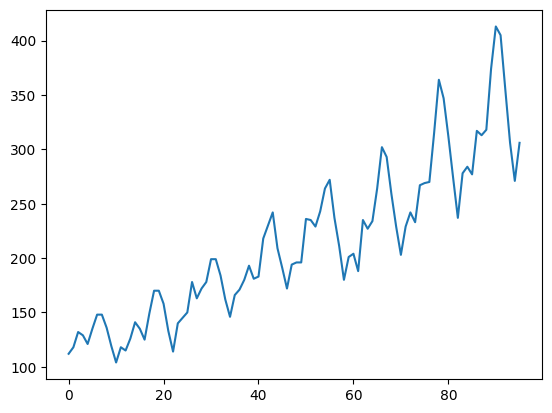

In [6]:
air_data.Passengers.plot()

<Axes: ylabel='Density'>

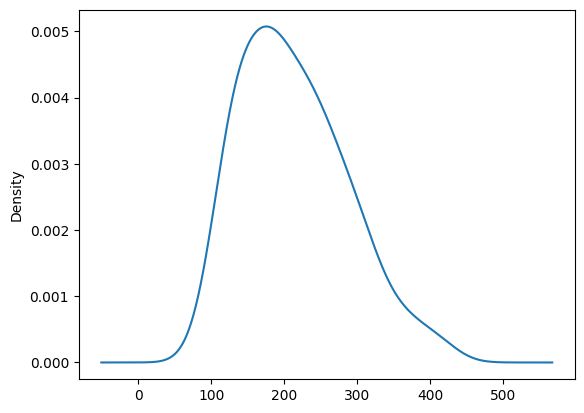

In [7]:
air_data.Passengers.plot(kind='kde')

<Axes: ylabel='Frequency'>

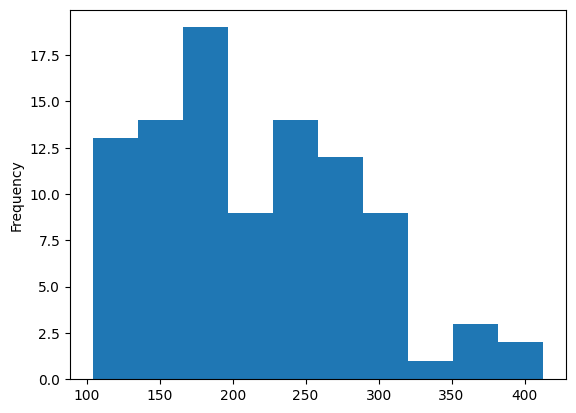

In [8]:
air_data.Passengers.plot(kind='hist')

In [9]:
temp=pd.read_excel('Airlines+Data.xlsx',header=0,index_col=0,parse_dates=True,squeeze=True)

Box plot to visualize the passengers in airlines for each year and identify the outliers

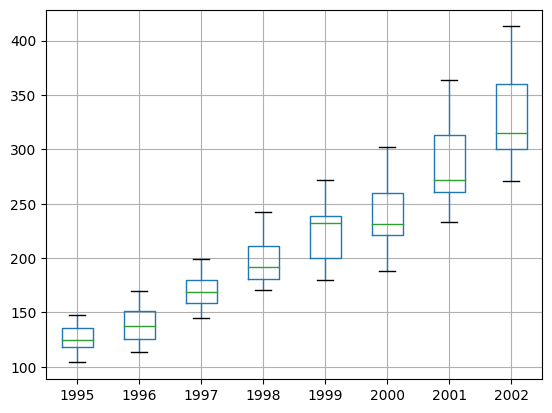

In [10]:
group=temp.groupby(pd.Grouper(freq='A'))
years=pd.DataFrame()
for i,j in group:
    years[i.year]=j.values
years.boxplot()
plt.show()

Lag plot - plot between lag values of airline passengers and lag time

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

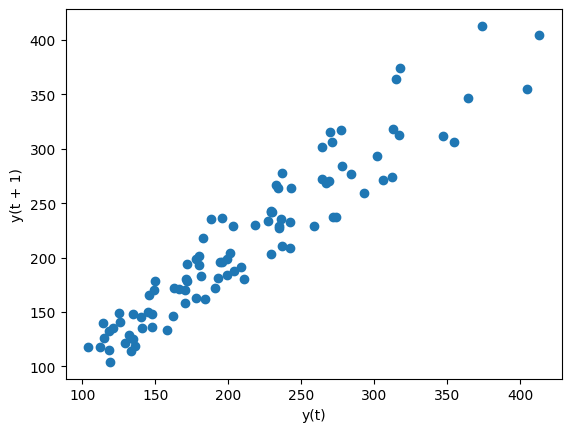

In [11]:
lag_plot(temp)

Performing the data driven methods on the dataset

Splitting the data into train and test data

In [12]:
train = air_data.head(77)
test = air_data.tail(19)

Moving Average and time decomposition plot¶

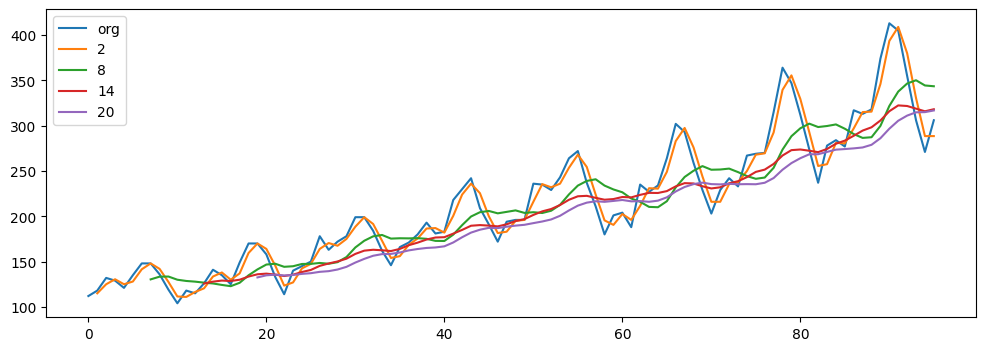

In [13]:
plt.figure(figsize=(12,4))
air_data.Passengers.plot(label="org")
for i in range(2,24,6):
    air_data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

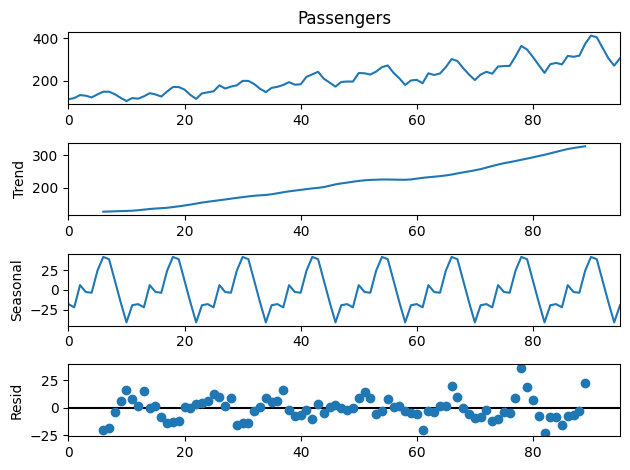

In [14]:
decompose_ts_add = seasonal_decompose(air_data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

ACF plot and PACF plot to identify the significant features that contribute to forecast 

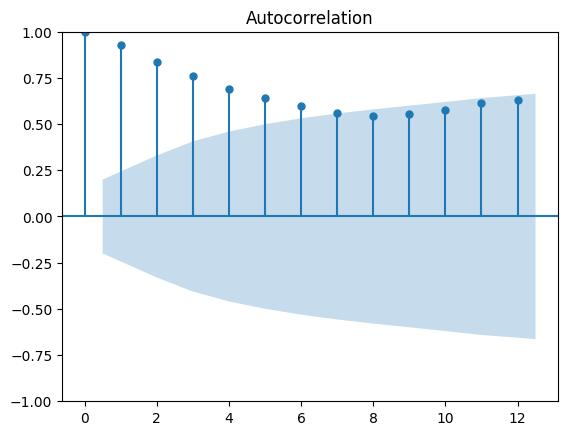

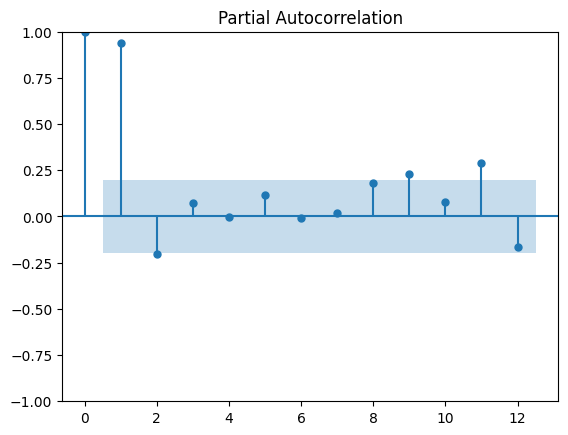

In [15]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(air_data.Passengers,lags=12)
tsa_plots.plot_pacf(air_data.Passengers,lags=12)
plt.show()


Creating a user defined function to calculate the RMSE value

In [16]:
def RMSE(pred,org):
    temp = (np.sqrt(np.mean((np.array(org)-np.array(pred))**2)))
    return temp

Developing a data driven model - Simple exponential method

In [17]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
r1=RMSE(pred_ses,test.Passengers) 
r1

80.54332901444305

Developing a model - Holt's model

In [26]:
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
r2=RMSE(pred_hw,test.Passengers) 
r2

47.877728640303836

Developing a model - Holts winter exponential smoothing with additive seasonality and additive trend


In [19]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
r3=RMSE(pred_hwe_add_add,test.Passengers) 
r3

35.902298336684105

Developing a model - Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [20]:
hwe_model_mul_add = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
r4=RMSE(pred_hwe_mul_add,test.Passengers)
r4

30.905644200950647

Consolidating the results

In [29]:
p={"model":pd.Series(['Simple exponential','Holts model','Holts-add seas,add trend','Holts-multisea,add trend']),
   "RMSE":[r1,r2,r3,r4]}

In [30]:
p=pd.DataFrame(p)
p

,model,RMSE
0,Simple exponential,80.543329
1,Holts model,47.877729
2,"Holts-add seas,add trend",35.902298
3,"Holts-multisea,add trend",30.905644


Creating a final model

In [31]:
hwe_model_mul_add_new = ExponentialSmoothing(air_data["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

Forecasting of next 20 time periods

In [32]:
hwe_model_mul_add_new.forecast(20)

96     312.899424
97     308.171306
98     355.532782
99     345.769814
100    345.696096
101    392.470733
102    436.501361
103    429.859243
104    380.172872
105    332.317301
106    290.625519
107    330.590176
108    337.370197
109    332.116256
110    382.980004
111    372.292701
112    372.044900
113    422.195877
114    469.353968
115    462.010291
dtype: float64

**Conclusion:** From the consolidated results, the model with the lowest RMSE value is holts winter exponential smoothing with multiplicative seasonality and additive trend of 30.9. Model with low RMSE value is best model. Thus,it is well suited to forecast the airlines passengers data. 